In [35]:
import pandas as pd
import numpy as np
import chunk
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [2]:
#pd.set_option('display.max_columns',15)
#pd.set_option('display.max_rows',100)

In [15]:
m12merge=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//m12merge.csv')
m12X=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//m12X.csv')
m12T=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//m12T.csv')
m12d=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//m12discrete.csv')
m12c=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//m12continuous.csv')
m12merge=m12merge.drop('Unnamed: 0',axis=1)
m12X=m12X.drop('Unnamed: 0',axis=1)
m12T=m12T.drop('Unnamed: 0',axis=1)
m12d=m12d.drop('Unnamed: 0',axis=1)
m12c=m12c.drop('Unnamed: 0',axis=1)

In [16]:
def change_dtypes(x):
    x['Store Number']=x['Store Number'].astype(str)
    x['Item Number']=x['Item Number'].astype(str)
    return x
m12merge=change_dtypes(m12merge)

In [17]:
m12merge.dtypes

Store Number                  object
Item Number                   object
Volume Sold (Liters)         float64
State Bottle Cost            float64
Cost Total                   float64
Item_Number_Labels            object
Store_Labels                  object
Log_Trans:Volume_Sold_(L)    float64
dtype: object

In [57]:
m12ogc=m12merge[['Volume Sold (Liters)']]

# Linear Regression

In [59]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(m12ogc)
x_normalized = transformer.transform(m12ogc)
print(x_normalized.shape)

(183336, 1)


In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(m12d)
encoded = encoder.transform(m12d).toarray()

In [20]:
encodeddf = pd.DataFrame(encoded)

In [60]:
X = np.concatenate((x_normalized,encodeddf),axis=1)
Y= m12T

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=10000)

In [62]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

0.028087925020839455

r2_score with log transformation:     0.03185955208560132
r2_score without log transformation:  0.028087925020839455

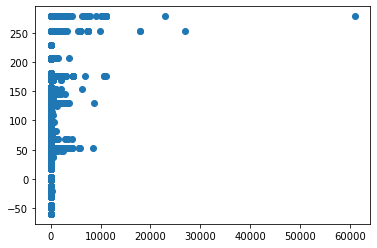

In [28]:
# With log transformation
plt.scatter(x=y_test,y=predictions)

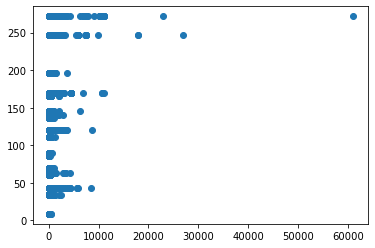

In [63]:
#without log transformation
plt.scatter(x=y_test,y=predictions)

# KNeighbors Regressor

In [58]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train,y_train)
predictions  = model.predict(x_test)
score = model.score(x_test,y_test)
lm = linear_model.LinearRegression()
model1 = lm.fit(x_train,y_train)
r2_score(y_test, predictions)

0.021021668237591218

n_neighbors count accuracy: 
2:   0.021021668237591218
3:   0.03710902186072107
4:   0.03388681650020786
5:   0.03337706848563726
6:   0.03317562871899604
7:   0.028337390416451225
10: -0.16765101206296174

# Random Forest

In [49]:
regr = RandomForestRegressor(n_estimators=90, random_state=0)
regr.fit(x_train, y_train)
print(regr.predict(x_test))

<ipython-input-49-f9f9d45c6794>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train, y_train)


[130.38523662  51.25813672  63.23170814 ...   8.51727839  63.23170814
 130.38523662]


In [50]:
regr.score(x_test,y_test, sample_weight=None)

0.04265824954418418

n_estimators accuracy:
50:  0.042636722717288134
90:  0.04265824954418418
100: 0.042667083712491616
150: 0.04265332770337327
200: 0.0426598189600198
500: 0.0426488324527311




# Basic Math

In [80]:
m12tester=m12merge.groupby(['Store Number']).agg({'Cost Total':['sum']})
m12tester.reset_index(inplace=True)
m12tester.columns=['Store','Total Bottle Cost']
m12tester.sort_values('Total Bottle Cost')
m12tester.describe()

,Total Bottle Cost
count,7.300000e+01
mean,2.753957e+05
std,8.545859e+05
min,4.562870e+03
25%,2.361854e+04
50%,8.197887e+04
75%,1.750184e+05
max,5.565212e+06


# Simple statistics suggest  82,000 dollars as a median material cost value, with 175,000 dollars covering 75% of the competition in the area

In [88]:
f13=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//final_2013.csv')
f14=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//final_2014.csv')
f15=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//final_2015.csv')
f16=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//final_2016.csv')
f17=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//final_2017.csv')
f13=f13.drop('Unnamed: 0',axis=1)
f14=f14.drop('Unnamed: 0',axis=1)
f15=f15.drop('Unnamed: 0',axis=1)
f16=f16.drop('Unnamed: 0',axis=1)
f17=f17.drop('Unnamed: 0',axis=1)

In [89]:
# convert data to appropriate dtypes
def change_dtypes(x):
    x['Date']=pd.to_datetime(x['Date'])
    x['Vendor Number']=x['Vendor Number'].astype(str)
    x['Store Number']=x['Store Number'].astype(str)
    x['Item Number']=x['Item Number'].astype(str)
    return x

# drop following stores due to extremely low sales (4115) and extremely high cost per bottle (4669)
def drop_bad_stores(x):
    x[x['Store Number']!='4115']['Store Number']
    x[x['Store Number']!='4669']['Store Number']
    
    return x
#drop outlier of item Remy Martin Louis Xiii Cognac (skews cost)
def drop_item_outlier(x):
    x[x['Item Number']!='903056']['Item Number']
    return x

def costtot(x,y):
    return x*y

In [90]:
f13=change_dtypes(f13)
f14=change_dtypes(f14)
f15=change_dtypes(f15)
f16=change_dtypes(f16)
f17=change_dtypes(f17)

f13=drop_bad_stores(f13)
f14=drop_bad_stores(f14)
f15=drop_bad_stores(f15)
f16=drop_bad_stores(f16)
f17=drop_bad_stores(f17)

f13['Cost Total']=list(map(costtot,f13['Bottles Sold'],f13['State Bottle Cost']))
f14['Cost Total']=list(map(costtot,f14['Bottles Sold'],f14['State Bottle Cost']))
f15['Cost Total']=list(map(costtot,f15['Bottles Sold'],f15['State Bottle Cost']))
f16['Cost Total']=list(map(costtot,f16['Bottles Sold'],f16['State Bottle Cost']))
f17['Cost Total']=list(map(costtot,f17['Bottles Sold'],f17['State Bottle Cost']))

In [91]:
f13=f13.groupby(['Store Number']).agg({'Cost Total':['sum']})
f13.reset_index(inplace=True)
f13.columns=['Store','Total Bottle Cost']
f13.sort_values('Total Bottle Cost')
f13.describe()

,Total Bottle Cost
count,8.200000e+01
mean,2.544020e+05
std,8.294309e+05
min,1.914630e+03
25%,3.262923e+04
50%,6.251919e+04
75%,1.634681e+05
max,5.809776e+06


In [92]:
f14=f14.groupby(['Store Number']).agg({'Cost Total':['sum']})
f14.reset_index(inplace=True)
f14.columns=['Store','Total Bottle Cost']
f14.sort_values('Total Bottle Cost')
f14.describe()

,Total Bottle Cost
count,8.300000e+01
mean,2.696088e+05
std,8.857028e+05
min,3.233950e+03
25%,3.403960e+04
50%,5.606083e+04
75%,1.615821e+05
max,6.163137e+06


In [93]:
f15=f15.groupby(['Store Number']).agg({'Cost Total':['sum']})
f15.reset_index(inplace=True)
f15.columns=['Store','Total Bottle Cost']
f15.sort_values('Total Bottle Cost')
f15.describe()

,Total Bottle Cost
count,9.000000e+01
mean,2.632542e+05
std,9.185732e+05
min,5.507300e+02
25%,3.277139e+04
50%,5.547094e+04
75%,1.339071e+05
max,6.557253e+06


In [94]:
f16=f16.groupby(['Store Number']).agg({'Cost Total':['sum']})
f16.reset_index(inplace=True)
f16.columns=['Store','Total Bottle Cost']
f16.sort_values('Total Bottle Cost')
f16.describe()

,Total Bottle Cost
count,8.400000e+01
mean,2.115668e+05
std,6.948624e+05
min,3.176470e+03
25%,3.161324e+04
50%,4.985196e+04
75%,1.223662e+05
max,4.783093e+06


# Year        Median Cost       75th Percentile Cost

# 2012        82,000                 175,000
# 2013        62,000                 163,000
# 2014        56,000                 162,000
# 2015        55,000                 134,000
# 2016        50,000                 122,000
# 2017 N/A, only has 10 months recorded 

In [112]:
Year = [2012,2013,2014,2015,2016]
median_Cost_in_Thousands = [82,62,56,55,50]
cost__75th_percentile_in_Thousands = [175,163,162,134,122]

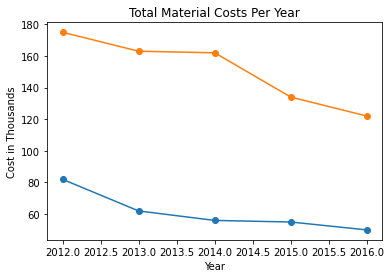

In [116]:
plt.plot(Year,median_Cost_in_Thousands,marker='o')
plt.plot(Year,cost__75th_percentile_in_Thousands,marker='o')
plt.title('Total Material Costs Per Year')
plt.xlabel('Year')
plt.ylabel('Cost in Thousands')
plt.show()

# Costs are dropping annually